## 8.2. Ham and Spam Message Classification

### 8.2.1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 8.2.2. Importing the Dataset

In [2]:
data_path = "https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv"
message_dataset = pd.read_csv(data_path, engine='python')
message_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
message_dataset.shape

(5572, 5)

In [4]:
message_dataset = message_dataset.filter(["v1", "v2"])
message_dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


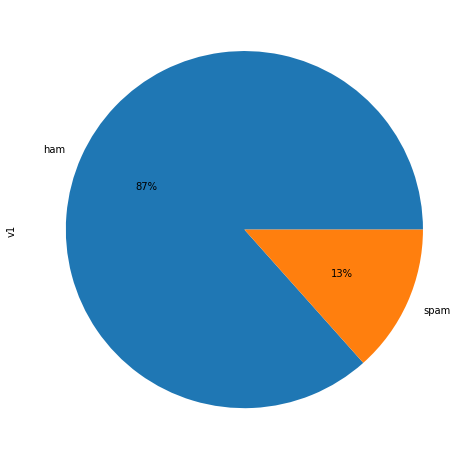

In [5]:

plt.rcParams["figure.figsize"] = [8,10] 
message_dataset.v1.value_counts().plot(kind='pie', autopct='%1.0f%%')

### 8.2.3. Cleaning the Data

In [6]:
X = message_dataset["v2"]

y = message_dataset["v1"]


In [7]:
def clean_text(doc):


    document = re.sub('[^a-zA-Z]', ' ', doc)

    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    document = re.sub(r'\s+', ' ', document)

    return document


In [8]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))

### 8.2.4. Converting Text to Numbers

In [9]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

### 8.2.5. Training the Model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 8.2.6. Evaluating Model Performance

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[963   2]
 [ 20 130]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

0.9802690582959641


### 8.2.7 Making Prediction on Single Instance

In [14]:
print(X_sentences[56])
print(y[56])

Congrats year special cinema pass for is yours call now Suprman Matrix StarWars etc all FREE bx ip we pm Dont miss out 
spam


In [15]:
print(clf.predict(vectorizer.transform([X_sentences[56]])))

['spam']


## Exercise 8.1

**Question 1:**

Which attribute of the TfidfVectorizer vectorizer is used to define the minimum word count:

A. min_word

B. min_count

C. min_df

D. None of the Above

**Answer: C**
    

**Question 2:**

Which method of the RandomForestClassifier object is used to train the algorithm on the input data:

A. train()

B. fit()

C. predict()
 
D. train_data()

**Answer: B**
    
    
**Question 3:**

Sentimental analysis with RandomForestClassifier is a type of _______ learning problem

A. Supervised 

B. Unsupervised

C. Reinforcement

D. Lazy
    
**Answer: A**

## Exercise 8.2

Use CountVectorizer to perform sentimental analysis of the "imdb_reviews.csv" dataset available in the "Resources/Datasets" folder of this book. See if you can get better performance with CountVectorizer compared to the TfidfVectorizer.

**Solution:**

In [16]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_path = "E:/Datasets/imdb_reviews.csv"
movie_dataset = pd.read_csv(data_path, engine='python')

X = movie_dataset["SentimentText"]

y = movie_dataset["Sentiment"]

def clean_text(doc):


    document = re.sub('[^a-zA-Z]', ' ', doc)

    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    document = re.sub(r'\s+', ' ', document)

    return document

X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))
    

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer (max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

KeyboardInterrupt: 